

> Performing KNN algorithm to classify the smokers and non-smokers.
The model's accuracy is increased by performing hyperparameter tuning(grid search).confusion matrix is plotted to evaluate the models performance.



In [ ]:
import pandas as pd
d=pd.read_csv('/content/finaltraindata.csv')

Summary Statistics:
                 id           age    height(cm)    weight(kg)     waist(cm)  \
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000   
mean    5000.000000     44.473053    165.303070     67.087291     82.961184   
std     2887.184355     11.670788      8.735917     12.473984      8.938848   
min        0.000000     20.000000    140.000000     30.000000     51.000000   
25%     2500.000000     40.000000    160.000000     60.000000     77.000000   
50%     5000.000000     40.000000    165.000000     65.000000     83.000000   
75%     7500.000000     55.000000    170.000000     75.000000     89.000000   
max    10000.000000     85.000000    190.000000    130.000000    124.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    10001.000000     10001.000000   10001.000000    10001.000000   
mean         1.007339         1.003890       1.026097        1.026797   
std          0.409583         0.416019       0.15

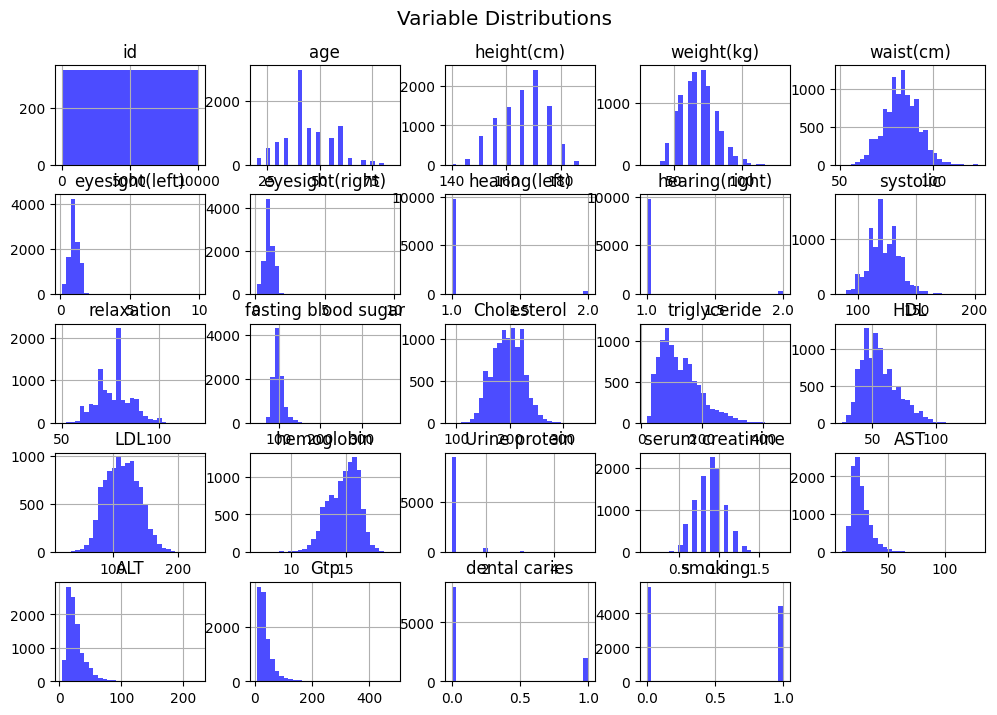

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/finaltraindata.csv')

summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)

df.hist(bins=30, figsize=(12, 8), color='blue', alpha=0.7)
plt.suptitle('Variable Distributions', x=0.5, y=0.95, ha='center', fontsize='x-large')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/finaltraindata.csv')
print(df.head())
df = df.dropna()
df = df.drop_duplicates()

df.to_csv('preprocessed_dataset.csv', index=False)


   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/finaltraindata.csv')
X = df.drop('smoking', axis=1)
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('/content/preprocessed_dataset.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled,y)

y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y,y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8434156584341566


Accuracy: 0.8434156584341566
[[4700  874]
 [ 692 3735]]


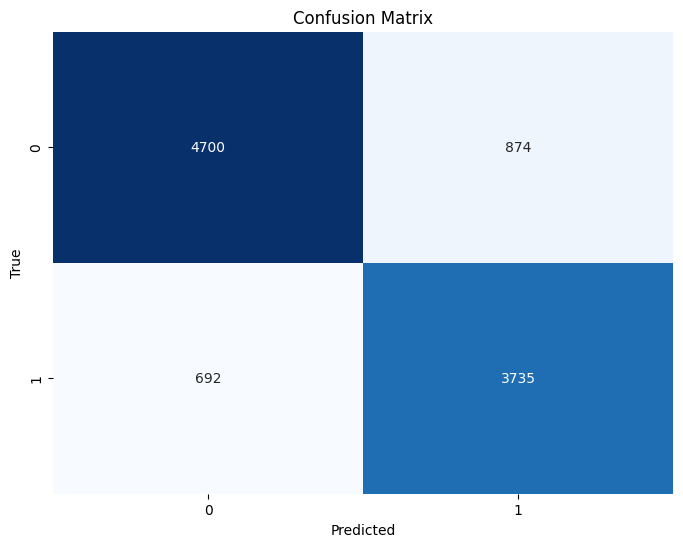

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y,y_pred)
print(f"Accuracy: {accuracy}")

cm=confusion_matrix(y,y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'n_neighbors': df,
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
print(param_grid)

{'n_neighbors':           id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0   55         165          60       81.0             0.5   
1          1   70         165          65       89.0             0.6   
2          2   20         170          75       81.0             0.4   
3          3   35         180          95      105.0             1.5   
4          4   30         165          60       80.5             1.5   
...      ...  ...         ...         ...        ...             ...   
9996    9996   55         170          75       88.0             0.6   
9997    9997   40         160          65       86.0             0.9   
9998    9998   60         150          55       80.0             1.0   
9999    9999   60         165          70       84.7             0.9   
10000  10000   60         165          80       92.0             0.7   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
0                  0.6              1     

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)


In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'algorithm': 'kd_tree', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Accuracy on Test Set: 0.9396060393960604


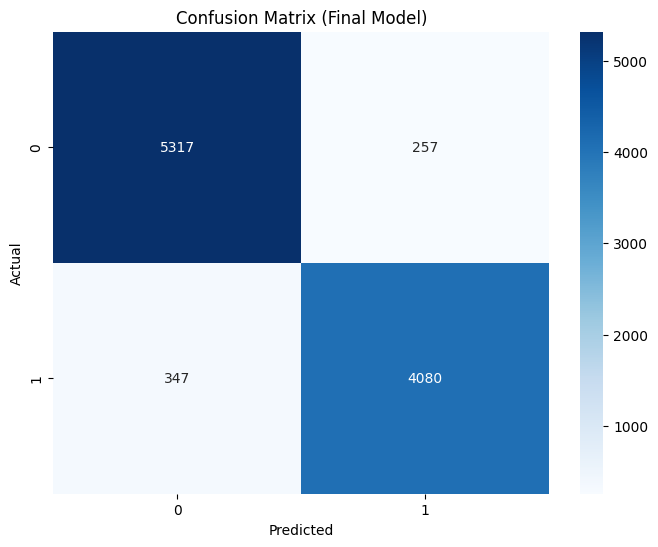

In [ ]:
conf_matrix_final = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Final Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()